***`Load Prepared Data`***

In [1]:
# prepare libraries
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [2]:
# load cleaned data
df=pd.read_csv('stack_overflow_processed.csv')

In [3]:
# list the righ order of age ranges
categories=['Under 18 years old',
      '18-24 years old',
      '25-34 years old',
      '35-44 years old',
      '45-54 years old',
      '55-64 years old',
      '65 years or older',
      'Prefer not to say'
      ]
df['Age']=pd.Categorical(df['Age'],categories=categories,ordered=True)

# List the categories in the righ order
categories=[
    '0-5 years',
    '6-10 years',
    '11-20 years',
    '21-30 years',
    '31-40 years',
    '41-49 years',
    '+50 years'
]

df['ProExperience']=pd.Categorical(df['ProExperience'],categories=categories,ordered=True)


In [4]:
# Histogram' function
def Histogram(data,xlabel=None,title=None,bin=50,color='green'):
    plt.figure(figsize=(7,5))
    plt.hist(x=data,bins=bin,color=color)
    if xlabel:
        plt.xlabel(xlabel)
    if title :
        plt.title(title)
    plt.show()

# Bar chart's Function
def Barchart(categories, values,
             xlabel=None, ylabel=None,
             title=None,
             orient='v',
             figsize=(6,5),
             rotation=0):

    plt.figure(figsize=figsize)

    if orient == 'v':
        sns.barplot(x=categories, y=values)
        plt.xticks(rotation=rotation)

    else:
        sns.barplot(x=values, y=categories)

    if xlabel:
        plt.xlabel(xlabel)

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title)

    plt.show()

# Regression Plot
def reg_plot(x_data,y_data,
             xlabel=None,ylabel=None,
             title=None,color='blue',linecolor='red'):

    # Graph
    plt.figure(figsize=(7,5))
    sns.regplot(x=x_data,
                y=y_data,
                color=color,
                line_kws={'color':linecolor}
                )
    #labels
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.show()

# Dot plot Function
def Dotplot(x_data,y_data,xlabel=None,ylabel=None,title=None):
    plt.figure(figsize=(7,5))
    plt.plot(x_data, y_data, "o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()  

In [5]:
# Treemap Function
def treemap(data, path, values, color=None, title=None, root_label="World"):

    path_copy = [px.Constant(root_label)] + path

    fig = px.treemap(
        data_frame=data,
        path=path_copy,
        values=values,
        color=color,
        title=title
    )

    fig.show()



####  ***`Exploratory Data Analysis (EDA)`***

***`Question 1`***
+  What is the distribution of yearly compensation among respondents, and are there any outliers?

In [6]:
# Check basic statistics of ConvertedCompYearly
print(df['ConvertedCompYearly'].describe())

# display the median 
print('the median: ',df['ConvertedCompYearly'].median())


count     22274.000000
mean      71458.252851
std       51245.099936
min           1.000000
25%       32222.000000
50%       63694.000000
75%      101770.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64
the median:  63694.0


-Distribution is right-skewed with a few extreme outliers.

-Median salary: $65,000. 

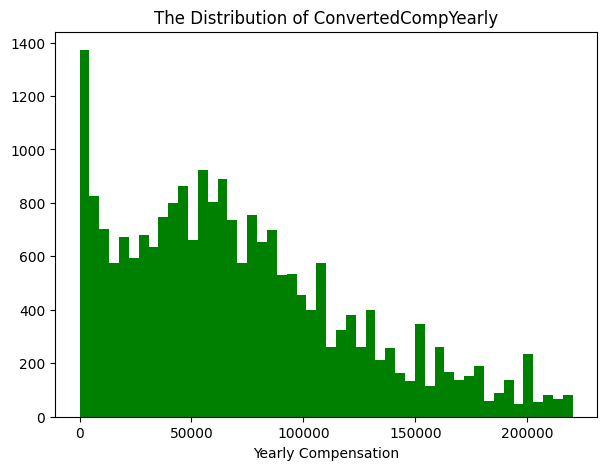

In [7]:

# Prepare data
xlabel='Yearly Compensation' # x-axis label

title='The Distribution of ConvertedCompYearly' # title

data=df['ConvertedCompYearly'] 


# Plot the distribution of ConvertedCompYearly using a histogram
Histogram(data,xlabel,title)

This Histogram shows the respondents' annual compensation  after removing salaries above 500,000 to reduce the affect of outliers.

The distribution is right-skewed,with most salares concentrated bellow 120,000,The frequency gradually decreases as compensation inceases ,formin  a long tail toward highier income salaries.

This pattern suggests that while the majority of respondents earn mid-range salary, a smaller porporsion earn higher incomes

***`Question 2`***

Which numeric factors are most correlated with salary?

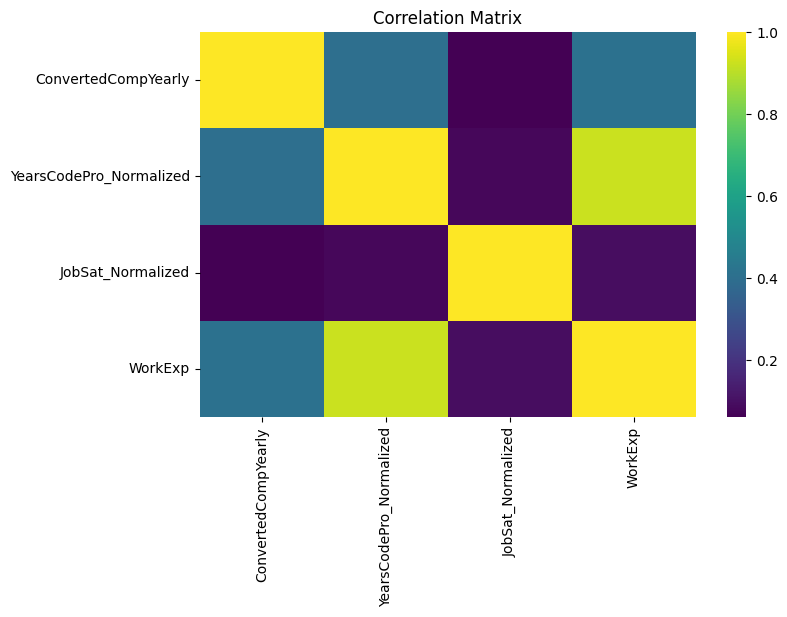

In [8]:
# Select the numeric columns from df_filtred
numeric_cols = df[[
    'ConvertedCompYearly',
    'YearsCodePro_Normalized',
    'JobSat_Normalized',
    'WorkExp',
    
]]

# Display Heatmap ,representing the correlation matrix
plt.figure(figsize=(8,5))

sns.heatmap(numeric_cols.corr(), cmap='viridis')

plt.title("Correlation Matrix")

plt.show()


YearsCodePro_Normalized and WorkExp show the strongest positive correlation with salary, meaning more experience is associated with higher pay. JobSat_Normalized has a weak correlation with salary.


***`Question 3`***
+ How are survey respondents distributed across countries, and which countries contribute the largest annual compensation?


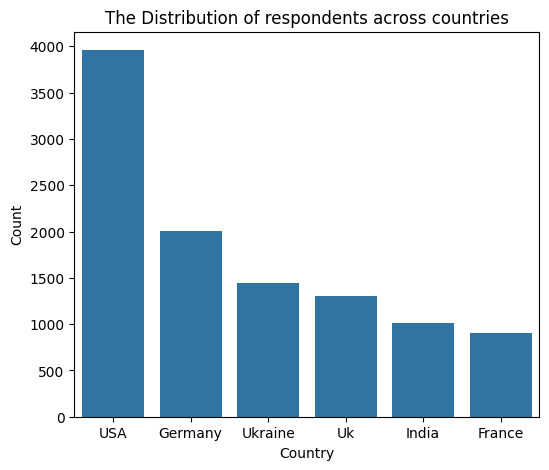

In [9]:
# Group the data using Country column
# and count how many rows corresponding to each country
country_group=(
    df.groupby(by=['Country_Normalized']) # group the data
    .size()                               # count records
    .reset_index(name='Count')            # reset indeces and store the number of records in new column
    .sort_values('Count',ascending=False) # sort the data descending by Count 
)

# Top 6 countries with high number of rows
top_6=country_group.head(6)

category=top_6['Country_Normalized']
value=top_6['Count']
title='The Distribution of respondents across countries'
xlabel='Country'
ylabel='Count'
# Display the Distribution of respondents across countries
Barchart(category,
         value,
         xlabel,
         ylabel,
         title)

The bar chart shows the top six countries by number of respondents. The USA has by far the largest share, followed by Germany and Ukraine. France has the smallest count among the top group. This indicates the survey is strongly skewed toward USA-based developers.


In [10]:
# Creat a Grouped  data by countries 
# and count the average annual compensation corresponding to each country
grop_country_comp=(
    df.groupby(by=['Country_Normalized'])['ConvertedCompYearly']
    .mean()
    .reset_index(name='Compensation_avg')
)

# Creat a Grouped  data by countries 
# and count the average annual compensation corresponding to each country
country_count=(
    df.groupby(by=['Country_Normalized'])
    .size()
    .reset_index(name='Count')
)

# Merge the groups 
merged=pd.merge(grop_country_comp,country_count,on='Country_Normalized',how='inner')

# Top 20 countries with high number of respondents
top_20=merged.sort_values(by=['Count'],ascending=False).head(20)

# dispay the distribution of average salary by country using a treemap
treemap(
    data=top_20,
    path=['Country_Normalized'],
    values='Compensation_avg',
    color='Count',
    title='Annual Compensation By country'
)


The data shows the top 20 countries by number of respondents to reduce sample bias. The treemap displays average annual compensation by country. The USA leads with the highest salaries, followed by Switzerland, Israel, Australia, and Canada, while India has the lowest. This highlights that stable, high-income economies tend to offer higher software development salaries.

***`Question 4`***
+ What is the distribution of professional experience among respondents?


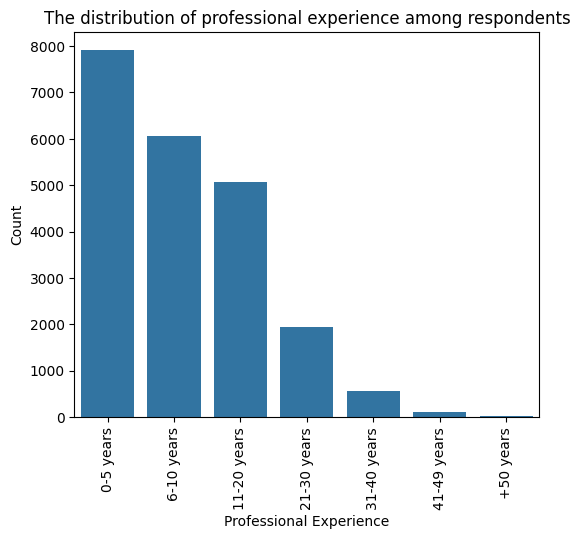

In [11]:
# Group the data using ProExperience column
# and count how many rows corresponding to each professional experience range 
experience_group=(
    df.groupby(by=['ProExperience'])
    .size()
    .reset_index(name='Count')
)

# data
category=experience_group['ProExperience']
value=experience_group['Count']

# labels
xlabel='Professional Experience'
ylabel='Count'
title='The distribution of professional experience among respondents'

# x-ticks
rotation=85

# Dispaly the bar chart
Barchart(categories=category,
         values=value,
         xlabel=xlabel,
         ylabel=ylabel,
         title=title,
         rotation=90
         )

The bar chart shows respondent counts by professional experience range. Most respondents have 0–10 years of experience, and the counts decrease steadily for higher experience levels, indicating the sample is skewed toward early-career professionals.


***`Question 5`***
+ Is there a relationship between professional experience and yearly compensation?

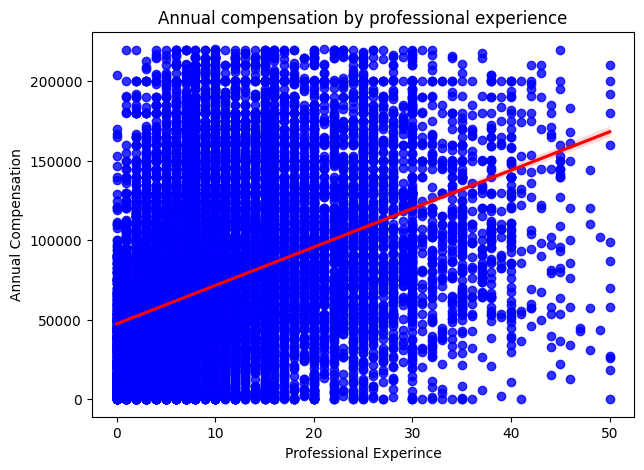

In [12]:
# Filltred data by Removing extreme salaries above $500,000
x_data=df['YearsCodePro_Normalized']
y_data=df['ConvertedCompYearly']

# labels
xlabel='Professional Experince'
ylabel='Annual Compensation'
title='Annual compensation by professional experience'

#display the scatter plot

reg_plot(
    x_data=x_data,
    y_data=y_data,
    xlabel=xlabel,
    ylabel=ylabel,
    title=title
)

Scatter plot using filtered data (salaries ≤ $500,000) comparing annual compensation and professional experience. The chart shows a positive trend, indicating that compensation generally increases with years of professional experience, though variability remains high.

***`Question 6`***
+ What are the most common developer roles among respondents?


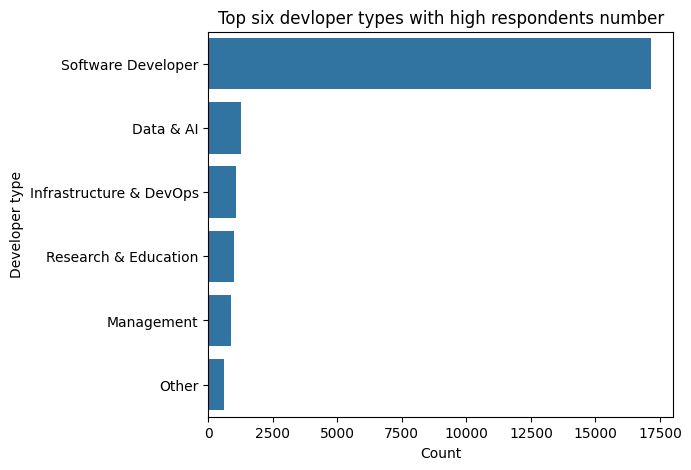

In [13]:
# Group the data by devtype_groupeed
# and count the number of records among each type of developers
dev_grouped=(
    df.groupby(by=['devtype_grouped']) #group data
    .size()   # count rows
    .reset_index(name='count') # reset indeses and store counts 
    .sort_values('count',ascending=False) # sort the data(descending)
)
# top 6 developers type with high number of respondents
dev_top_6=dev_grouped.head(6)

# parameters
catygory=dev_top_6['devtype_grouped']
value=dev_top_6['count']
#labels
xlabel='Count'
ylabel='Developer type'
title='Top six devloper types with high respondents number'
# display the bar chart 
Barchart(
    catygory,
    value,
    xlabel,
    ylabel,
    title,
    'h'
)

Bar chart based on `devtype_grouped` showing the number of respondents in each role category. Software Developers represent by far the largest group. Data & AI, Infrastructure & DevOps, and Management have similar and much smaller counts. This indicates the survey is strongly skewed toward Software Developers.


***`Question 7`***
+ How does median annual compensation differ across normalized developer role groups?


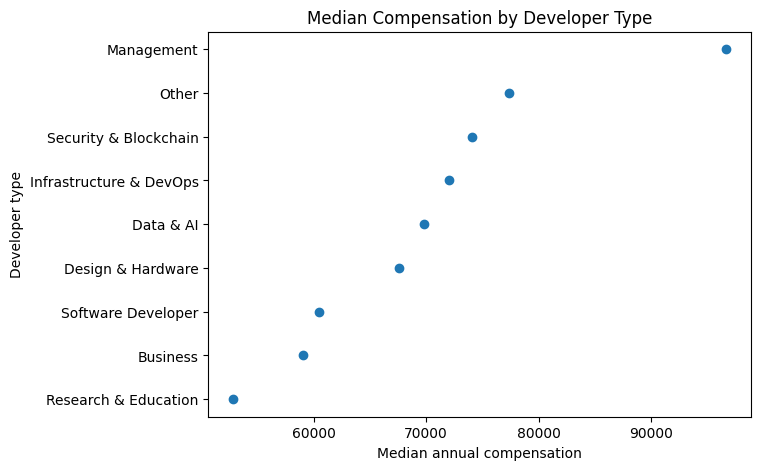

In [14]:
med_salary = (
    df.groupby("devtype_grouped")["ConvertedCompYearly"]
      .median()
      .sort_values()
)
plt.figure(figsize=(7,5))
plt.plot(med_salary.values, med_salary.index, "o")
plt.xlabel("Median annual compensation")
plt.ylabel("Developer type")
plt.title("Median Compensation by Developer Type")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Data & AI'),
  Text(1, 0, 'Research & Education'),
  Text(2, 0, 'Software Developer'),
  Text(3, 0, 'Management'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Infrastructure & DevOps'),
  Text(6, 0, 'Security & Blockchain'),
  Text(7, 0, 'Design & Hardware'),
  Text(8, 0, 'Business')])

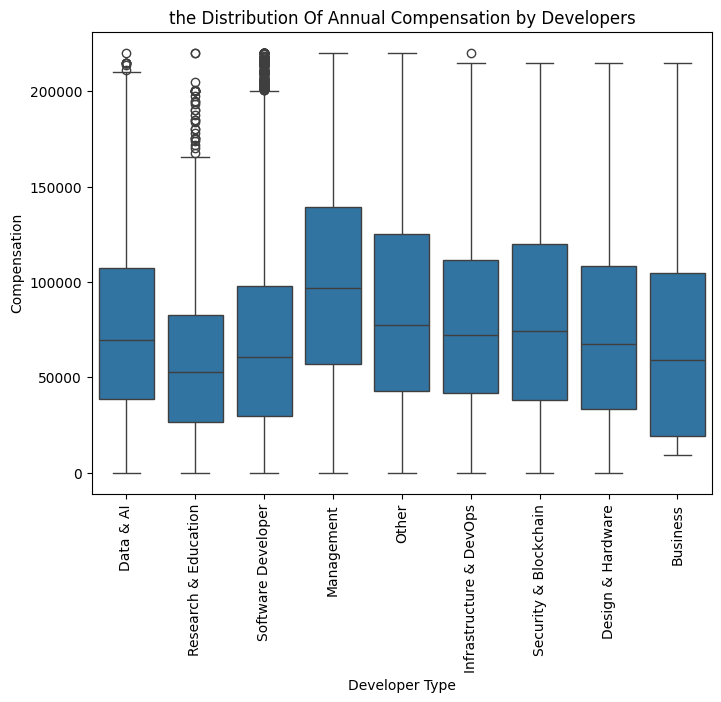

In [15]:
# Display the distribution of annual compensation using box plot
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='devtype_grouped',
    y='ConvertedCompYearly',
)
plt.xlabel('Developer Type')
plt.ylabel('Compensation')
plt.title('the Distribution Of Annual Compensation by Developers')
plt.xticks(rotation=90)

The Dotplot and The Boxplot show median and the distribution of annual compensation for each developer role group. Management has the highest median salary, followed by Security & Blockchain and Other technical roles. Research & Education and Business roles have the lowest medians. The chart highlights clear pay differences across role categories.


***`Question 8`***
+ What are the most common current and future thecnologies?

Language

In [16]:
#Explode function
def exploding(data:pd.DataFrame,column,separated)->pd.DataFrame:
    data[column]=data[column].str.split(separated) # split the semicolon-separated values into lists

    data=data.explode(column)# Convert each language in the list into its own row

    return data

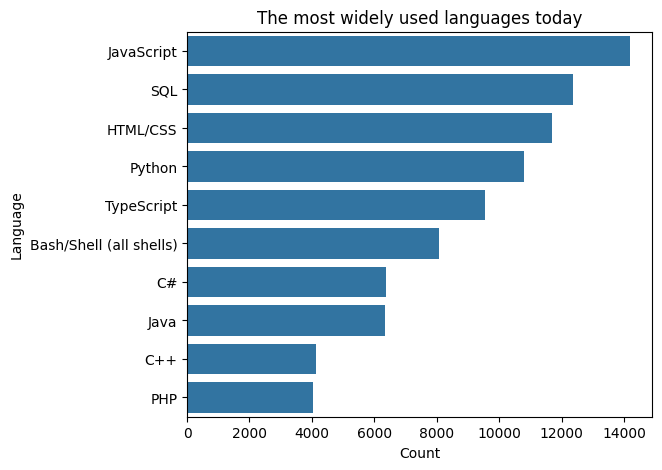

In [17]:
# Make a copy to avoid modifying the original datafram
languages=df.copy()

# Convert each language in the list into its own row
# Count how many times each language appears
languages=df['LanguageHaveWorkedWith'].str.split(';').explode()
count=languages.value_counts()
# select the top 10 used languages 
top_10=count.head(10)

# Prepare data for plotting
catygory=top_10.index
value=top_10.values

# Chart labels
xlabel='Count'
ylabel='Language'
title ="The most widely used languages ​​today"

# Plot horizontal bar chart
Barchart(
    catygory,
    value,
    xlabel,
    ylabel,
    title ,
    orient='h'
)

The bar chart shows the top 10 most commonly used languages among respondents, with JavaScript, SQL, and HTML/CSS leading the list. This suggests the survey is skewed toward web and backend developers.


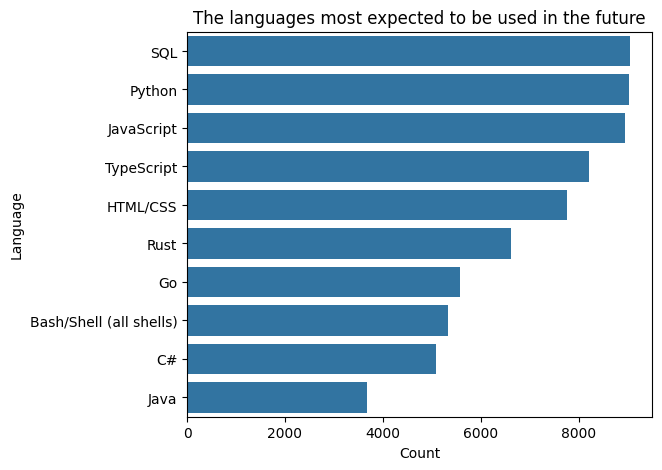

In [18]:
# Make a copy to avoid modifying the original datafram
# include only reported languages
future_lang=df[df['LanguageWantToWorkWith']!='No language reported'].copy()
#

# Convert each future language in the list into its own row
future_lang=df['LanguageWantToWorkWith'].str.split(';').explode()

# Count how many times each language appears
counts=future_lang.value_counts()

# select the top 10 would be used in the future  
top_10=counts.head(10)

# Prepare data for plotting
catygory=top_10.index
value=top_10.values

# Chart labels
xlabel='Count'
ylabel='Language'
title ="The languages ​​most expected to be used in the future"

# Plot horizontal bar chart
Barchart(
    catygory,
    value,
    xlabel,
    ylabel,
    title ,
    orient='h'
)


The bar chart shows the languages ​​most respondents are interested in working with in the future, with Python topping the list alongside SQL and JavaScript, and TypeScript seeing a notable increase. This suggests the market is poised for significant changes in the future.


In [19]:
# Convert each language in the list into its own row
languages_salary=exploding(
                        data=df[['LanguageHaveWorkedWith','ConvertedCompYearly']],
                        column='LanguageHaveWorkedWith',
                        separated=';'
                    )

# Group the data by languages 
# and count the average compensation
group_avg=(
    languages_salary.groupby(by=['LanguageHaveWorkedWith'])['ConvertedCompYearly']
    .mean()
    .reset_index(name='Avg_Compensation')
    .sort_values('Avg_Compensation')
)

# Group the data by languages 
# count records corresponding to each language
# select top 10 languages with high number of rows
group_count=(
    languages_salary.groupby(by=['LanguageHaveWorkedWith'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count',ascending=False)
).head(20)

# Inner join group_count,group_avg
languages_salary=pd.merge(group_count,group_avg,
                          on='LanguageHaveWorkedWith',
                          how='inner'
                          )
# display the treemap
treemap(
    data=languages_salary,
    path=['LanguageHaveWorkedWith'],
    values='Avg_Compensation',
    color='Count',
    title='The Languages by Average Compensation'

)

The data shows the primary programming languages filtered to highlight market trends and developer reach. The treemap displays average annual compensation by language (indicated by box size) and the total number of respondents (indicated by color). Ruby, Swift, and Rust lead with the highest average salaries, while high-volume languages like JavaScript, HTML/CSS, and SQL show the largest community presence. This highlights that specialized or "niche" languages often command higher pay, while ubiquitous web technologies maintain the highest density of developers globally.

Database


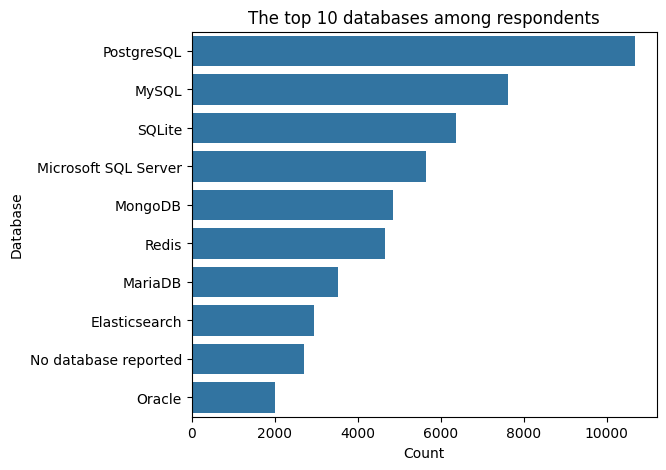

In [20]:
# Make a copy to avoid modifying the original datafram
# include only reported database
database=df[df['DatabaseHaveWorkedWith']!='No database reported'].copy()
#

# Convert each  database in the list into its own row
database=df['DatabaseHaveWorkedWith'].str.split(';').explode()

# Count how many times each database appears
counts=database.value_counts()

# select the top 10 used database 
top_10=counts.head(10)

# Prepare data for plotting
catygory=top_10.index
value=top_10.values

# Chart labels
xlabel='Count'
ylabel='Database'
title ="The top 10 databases among respondents"

# Plot horizontal bar chart
Barchart(
    catygory,
    value,
    xlabel,
    ylabel,
    title ,
    orient='h'
)

The bar chart shows the 10 most commonly used databases among respondents. PostgreSQL leads by a large margin, followed by MySQL and SQLite. This indicates strong adoption of relational databases.


Platform

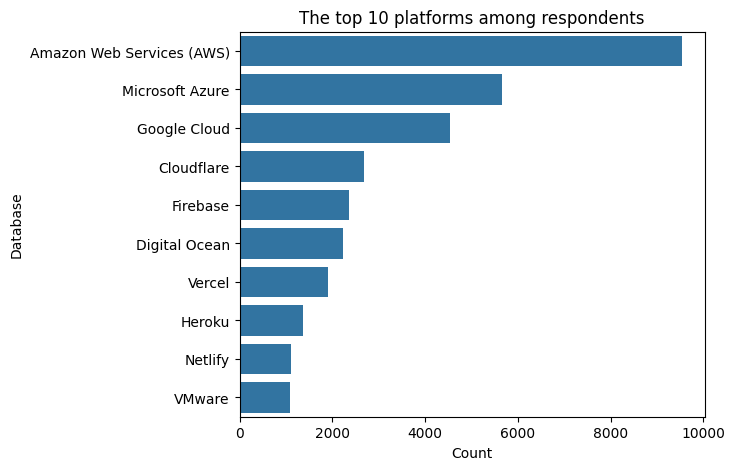

In [21]:
# Make a copy to avoid modifying the original datafram
# include only reported platforms
database=df[df['PlatformHaveWorkedWith']!='No platform reported'].copy()
#

# Convert each  Platforme in the list into its own row
database=exploding(
    database,
    'PlatformHaveWorkedWith',
    ';'
)

# Count how many times each platform appears
counts=database['PlatformHaveWorkedWith'].value_counts()

# select the top 10 used platform 
top_10=counts.head(10)

# Prepare data for plotting
catygory=top_10.index
value=top_10.values

# Chart labels
xlabel='Count'
ylabel='Database'
title ="The top 10 platforms among respondents"

# Plot horizontal bar chart
Barchart(
    catygory,
    value,
    xlabel,
    ylabel,
    title ,
    orient='h'
)


The bar chart shows the most used cloud platforms and hosting providers among respondents. Amazon Web Services (AWS) leads clearly, followed by Microsoft Azure and Google Cloud, indicating a strong preference for major cloud providers.


***`Question 9`***
+ What is the distribution of respondents by education level, and how does education relate to compensation?

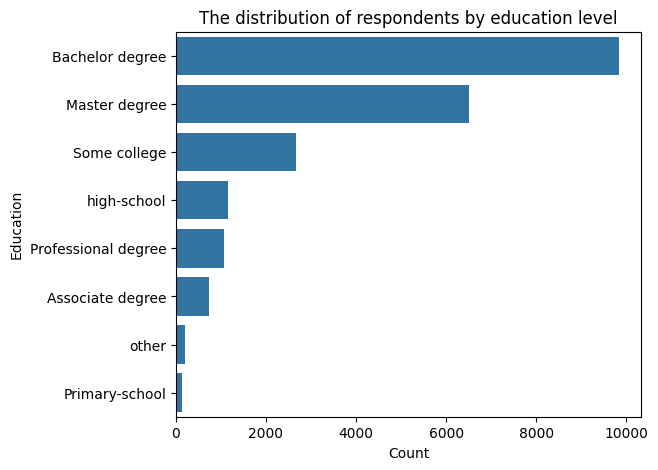

In [22]:
# Group data by EdLevel_Normalized
# and count the number of respondents' with each education level
edu_group=(
    df.groupby(by=['EdLevel_Normalized'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count',ascending=False)
)

# Display the bar chart
Barchart(
    edu_group['EdLevel_Normalized'],
    edu_group['Count'],
    'Count',
    'Education',
    title='The distribution of respondents by education level',
    orient='h'
)

The bar chart shows that most respondents hold a bachelor’s degree, followed by a master’s degree. Other education levels represent much smaller shares, indicating the survey sample is largely composed of university-educated participants.


<Figure size 1000x800 with 0 Axes>

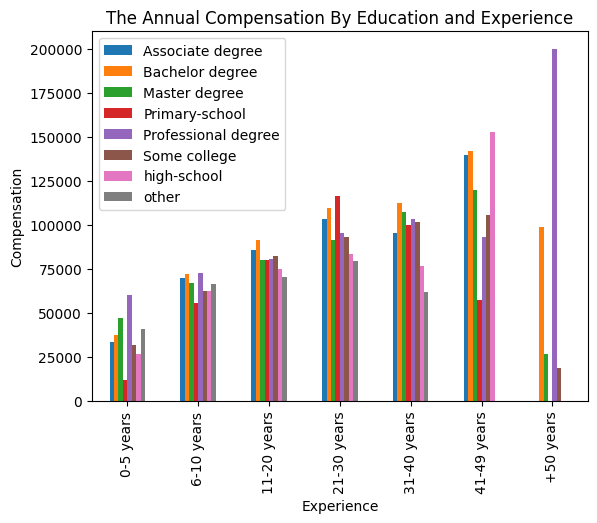

In [23]:
# Create a pivot table
pivot = pd.pivot_table(
    df,
    values='ConvertedCompYearly', # Table values
    index='ProExperience', # rows
    columns='EdLevel_Normalized', # colummns
    aggfunc='median' # median annual compensation
)
# display the stacked bar chart
plt.figure(figsize=(10,8))
pivot.plot(kind='bar',legend='left')
plt.xlabel('Experience')
plt.ylabel('Compensation')
plt.title('The Annual Compensation By Education and Experience')
plt.legend()


Annual compensation increases consistently with professional experience across most education levels. Respondents with Bachelor's and Master's degrees tend to earn higher salaries than other groups, especially between 21–49 years of experience. The highest compensation appears in the 41–49 years experience range, indicating peak earning potential in late career stages. Lower education levels, such as primary school and some college, generally show lower salaries across all experience ranges.

***`Question 10`***
+ What is the distribution of respondents’ ages?

In [24]:
df['Age'].unique()

['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Under 18 years old', 'Prefer not to say']
Categories (8, str): ['Under 18 years old' < '18-24 years old' < '25-34 years old' < '35-44 years old' < '45-54 years old' < '55-64 years old' < '65 years or older' < 'Prefer not to say']

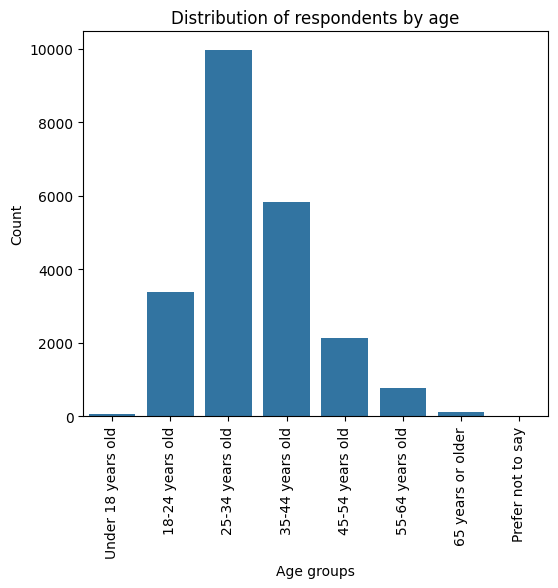

In [25]:
# count the number of respondents corresponding to each age range
age_groups=df['Age'].value_counts()

# prepare the data 
catygory=age_groups.index
value=age_groups.values

# labels
xlabel='Age groups'
ylabel='Count'
title='Distribution of respondents by age'
rotation=90

# display the bar chart
Barchart(
    catygory,
    value,
    xlabel,
    ylabel,
    title,
    rotation=rotation
)


The bar chart shows that most respondents are between 25–34 years old, followed by the 35–44 group. Participation decreases in older age ranges, indicating the survey sample is concentrated among early- to mid-career developers.


***`Question 11`***
+ What is the correlation between the annual compensation and age?

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Under 18 years old'),
  Text(1, 0, '18-24 years old'),
  Text(2, 0, '25-34 years old'),
  Text(3, 0, '35-44 years old'),
  Text(4, 0, '45-54 years old'),
  Text(5, 0, '55-64 years old'),
  Text(6, 0, '65 years or older'),
  Text(7, 0, 'Prefer not to say')])

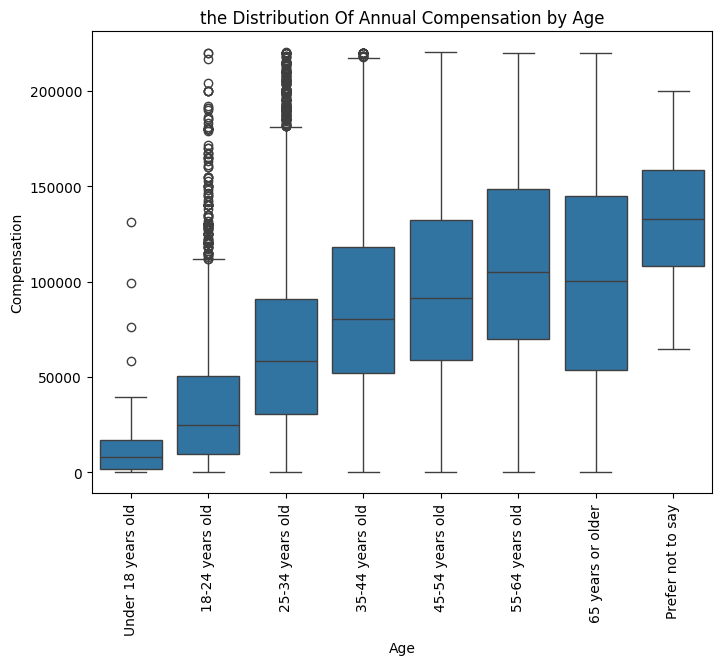

In [26]:
# remove the 
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='Age',
    y='ConvertedCompYearly',
)
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.title('the Distribution Of Annual Compensation by Age')
plt.xticks(rotation=90)

Annual compensation increases steadily with age, with median salaries rising from the youngest group to older age groups. Respondents aged 45–64 years show the highest median compensation, reflecting the impact of accumulated experience. Younger respondents (under 25) have the lowest salaries and the widest variability due to early-career stages. The distribution also shows significant outliers in most age groups, indicating some individuals earn substantially higher salaries than their peers.

***`Question 12`***
+ Which work model do most developers follow today?

Text(0.5, 1.0, 'Respondents by Work Model')

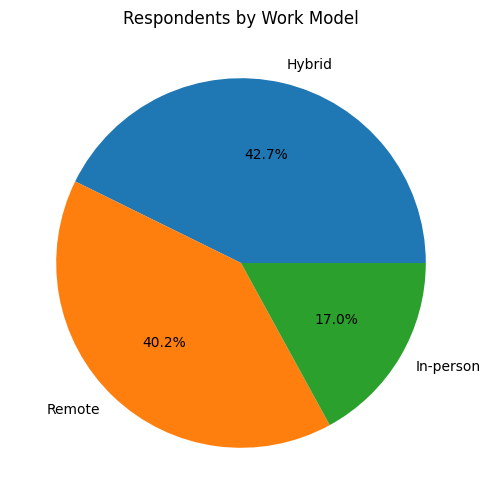

In [27]:
# Count the number of respondents by work model
count_work=df['RemoteWork'].value_counts()

# Prepare data
x_data=count_work.index
y_data=count_work.values

# Labels
title='Respondents by Work Model'

# Dispaly Pie Chart
plt.figure(figsize=(7,6))
plt.pie(x=y_data,labels=x_data,autopct='%.1f%%')
plt.title(title)

The chart shows how respondents are distributed across different work models.  
Hybrid and fully remote roles make up the large majority of responses, while fully in-person roles represent a much smaller share.  

This suggests that flexible work arrangements (remote or hybrid) are now the dominant work style among developers in the survey.

***`Question 13`***
+ How does the type of job affect job satisfaction?

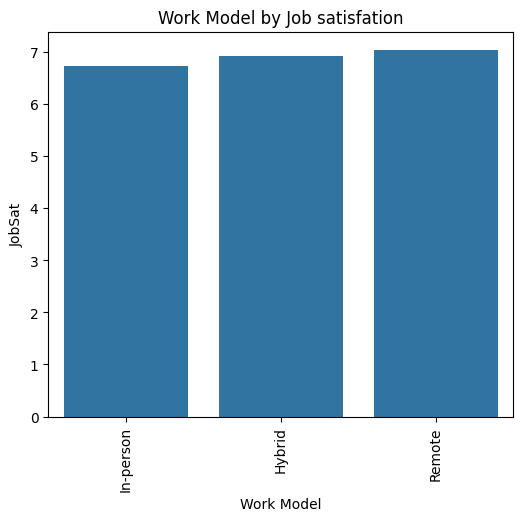

In [28]:
# Group the data by developer type
# and count the average jobsat among each developer type
group_dev_sat=(
    df.groupby(by=['RemoteWork'])['JobSat_Normalized']
    .mean()
    .reset_index()
    .sort_values('JobSat_Normalized')
)

# prepare the data 
category=group_dev_sat['RemoteWork']
value=group_dev_sat['JobSat_Normalized']

# labels
xlabel='Work Model'
ylabel='JobSat'
title='Work Model by Job satisfation'
rotation=90

# display the bar chart
Barchart(
    category,
    value,
    xlabel,
    ylabel,
    title,
    rotation=rotation
)



Job satisfaction is fairly similar across all work models, with remote workers showing a slightly higher average satisfaction score. This suggests that while work model has some impact, overall satisfaction levels are relatively close between in-person, hybrid, and remote roles.
